<a href="https://colab.research.google.com/github/dinithprimal/DeepLearning_Tutorials/blob/main/Ex05_Implement_Neural_Network_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


### Split train and test datasets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, test_size=0.2,  random_state=25)

### Preprocessing: Select the data so that both age and affordibility are in same scale

In [6]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes uo with. We will then try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the acrchitecture of our simple neural networ**

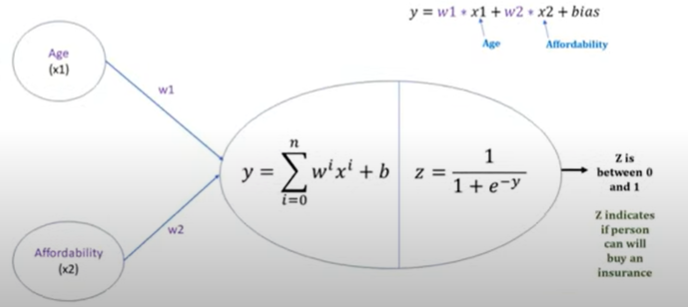

In [7]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2502/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2503/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5321 - accuracy: 0.7273
Epoch 2504/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2505/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2506/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5320 - accuracy: 0.7273
Epoch 2507/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5319 - accuracy: 0.7273
Epoch 2508/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5319 - accuracy: 0.7273
Epoch 2509/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5318 - accuracy: 0.7273
Epoch 2510/5000
1/1 [============================

### Evaluating the model on test set

In [10]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 144ms/step - loss: 0.3550 - accuracy: 1.0000


[0.3549776077270508, 1.0]

In [11]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [12]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [13]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 83ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

In [14]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

**This means**

*   w1 = 5.060863
*   w2 = 1.4086521
*   bias = -2.913703



In [15]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigmoid(18)

0.9999999847700205

**Instead of model.prediction, write our own funciton that uses w1, w2, and bias**

In [16]:
def prediction_funtion(age, affordibility):
  weighted_sum = coef[0] * age + coef[1] * affordibility + intercept
  return sigmoid(weighted_sum)

In [17]:
prediction_funtion(.47, 1)

0.705484819775958

In [18]:
prediction_funtion(.18, 1)

0.35569571637887243

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2, and bias that keras model calulated**

**We want to show how keras/tensorflow would have computed thses values internally using gradient descent**

In [20]:
def sigmoid_numpy(x):
  return 1 / (1 + np.exp(-x))

In [21]:
def log_loss(y_true, y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i, epsilon) for i in y_predicted]
  y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  return -np.mean(y_true * np.log(y_predicted_new) + (1 - y_true) * np.log(1 - y_predicted_new))

In [22]:
def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
  # w1, w2, bias
  w1 = w2 = 1
  bias = 0
  rate = 0.5
  n = len(age)

  for i in range (epochs):
    weighted_sum = w1 * age + w2 * affordability + bias
    y_predicted = sigmoid_numpy(weighted_sum)

    loss = log_loss(y_true, y_predicted)

    d_w1 = (1/n) * np.dot(np.transpose(age) , (y_predicted - y_true))
    d_w2 = (1/n) * np.dot(np.transpose(affordability) , (y_predicted - y_true))

    d_bias = np.mean(y_predicted - y_true)

    w1 = w1 - rate * d_w1
    w2 = w2 - rate * d_w2

    bias = bias - rate * d_bias

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss<=loss_threshold:
      break

  return w1, w2, bias

In [23]:
gradient_descent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [32]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def fit(self, X, y, epochs, loss_threshold):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'], y, epochs, loss_threshold)

  def predict(self, X_test):
    weighted_sum = self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self, age, affordibility, y_true, epochs, loss_threshold):
    # w1, w2, bias
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)

    for i in range (epochs):
      weighted_sum = w1 * age + w2 * affordibility + bias
      y_predicted = sigmoid_numpy(weighted_sum)

      loss = log_loss(y_true, y_predicted)

      d_w1 = (1/n) * np.dot(np.transpose(age) , (y_predicted - y_true))
      d_w2 = (1/n) * np.dot(np.transpose(affordibility) , (y_predicted - y_true))

      d_bias = np.mean(y_predicted - y_true)

      w1 = w1 - rate * d_w1
      w2 = w2 - rate * d_w2

      bias = bias - rate * d_bias

      if i%50 == 0:
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

      if loss<=loss_threshold:
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        break

    return w1, w2, bias

In [33]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=500, loss_threshold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917


In [34]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

In [35]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 32ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)